## Dogs vs. Cats

Write an algorithm to classify whether images contain either a dog or a cat. 

Dataset: https://www.kaggle.com/c/dogs-vs-cats

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import itertools
%matplotlib inline
from keras import backend as K


import warnings
warnings.filterwarnings('ignore')

### Preprocessing

In [3]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path  = 'cats-and-dogs/test'

In [4]:
# Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog','cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


### Plotting images

In [5]:
# plotting images with labels witin jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
        
    f=plt.figure(figsize=figsize)
   
    cols=len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
print(train_batches)

In [7]:
# The next() function returns the next item in an iterator.
# images along with their respective labels are iterated over train_batches
imgs, labels = next(train_batches)

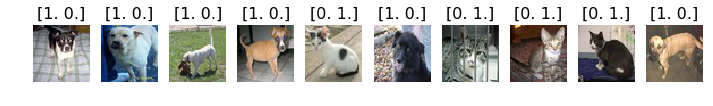

In [8]:
plots(imgs, titles=labels)

In [9]:
print(imgs.shape)
print(imgs[0].shape)
print(imgs[1].shape)

(10, 224, 224, 3)
(224, 224, 3)
(224, 224, 3)


### Build Model

In [10]:
model = Sequential()
num_classes = 2

# First convolutional layer, note the specification of shape
# Kernels are like set of tiles over shaped data. 
# They act like little windows, that will look over subsets of the data of a given size.
# 3x3 kernels, run overlapping over the whole 224x224 input looking for features.
# Convolutional Layer = "a way of searching for a subpattern over the whole of the image".
# multiple convolutional layers can be chained together.

# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))

# Second Convolutional layer          
model.add(Conv2D(32, (3, 3), activation='relu'))
          
# Pooling is a downsampling technique, which effectively serves to reduce sample size and simplify later processes. 
# For each value generated by the convolutional layers, it looks over the grid in non-overlapping segments 
# and takes the maximum value of those outputs. 
# It's not the feautres exact location then that matters, but its approximate or relative location.          

# pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout drops a certain portion of our perceptrons in order to prevent overfitting.
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

          
# Full connection          
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
          
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compiling the model

In [11]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# optimizer = Adam is an optimization parameter, lr means learning rate 
# Stochastic Gradient Descent - SGD is also an optimizer you can use.
# there is a variety of loss functions, you can also use MAE or MSE.

In [12]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=10, verbose=2)

# It fits the model on data generated batch by batch by our image data generator
# steps_per_epoch is the total number of steps or the batches of samples to yield from the generator
# before declaring one epoch is finished, 40 images, batch size 10, steps_per_epoch = 40/10 = 4
# validation steps are calculated the same way as we calculate steps_per_epoch.

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 6s - loss: 8.6699 - acc: 0.4000 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 2/10
 - 5s - loss: 5.8320 - acc: 0.6250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 5s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 5s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 5s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 5s - loss: 6.8502 - acc: 0.5750 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 5s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 5s - loss: 8.8650 - acc: 0.4500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 5s - loss: 8.4620 - acc: 0.4750 - val_loss: 8.0590 - val_acc: 0.5000


### Predict

In [13]:
test_imgs, test_labels = next(test_batches)

In [14]:
test_labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

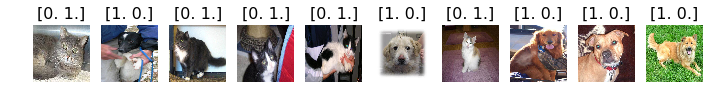

In [22]:
# cats are labeled 0 and dogs 1
plots(test_imgs,titles=test_labels)

In [28]:
# Making labels one dimensional, only grabbing first column.
test_labels = test_labels[:,0]

In [29]:
test_labels

array([0., 1., 0., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)

In [30]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

# Total no of images in test batches is 20, batch size is 10, that's why step is 1

In [31]:
predictions
# [1,0] = dog
# [0,1] = cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [32]:
# prediction says that its all dogs
predictions[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [33]:
cm = confusion_matrix(test_labels, predictions[:,0])

[Plotting Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

In [34]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 5]
 [0 5]]


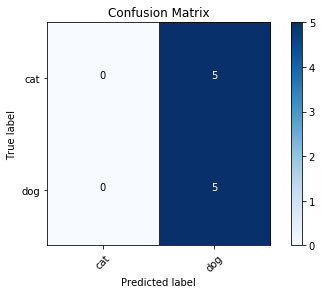

In [35]:
cm_plot_labels =['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#### More complex model required to increase accuracy